<a href="https://colab.research.google.com/github/dudller/dw_3/blob/master/Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten, MaxPool2D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import os
import datetime
import matplotlib.pyplot as plt
from skimage import color,exposure
from sklearn.metrics import accuracy_score
%load_ext tensorboard

In [2]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/part3/dw_3'

/content/drive/My Drive/Colab Notebooks/dw_matrix/part3/dw_3


In [0]:
train=pd.read_pickle('data/train.p')
X_train,y_train = train['features'],train['labels']
test=pd.read_pickle('data/test.p')
X_test,y_test = test['features'],test['labels']

names=pd.read_csv('data/names.csv')

In [0]:
y_train,y_test=to_categorical(y_train),to_categorical(y_test)

In [0]:
input_shape=X_train.shape[1:]
output=y_train.shape[1]

In [0]:
def get_cnn_1(input_shape,output):
  return Sequential([
       Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'),
       Flatten(),
       Dense(output,activation='softmax')           
        ])
def train_model(X_train,y_train,model,fit_params={}):
  model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
  logdir=os.path.join('logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callback=tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
  model.fit(X_train,y_train,
            batch_size=fit_params.get('batch_size',128),
            epochs=fit_params.get('epochs',5),
            verbose=fit_params.get('verbose',1),
            validation_data=fit_params.get('val_data',(X_train,y_train)),
            callbacks=[tensorboard_callback]
            )
  return model

In [0]:
model=get_cnn_1(input_shape,output)
#logdir=train_model(X_train,y_train,model)

In [0]:
def get_cnn_2(input_shape,output):
  return Sequential([
       Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'),
       MaxPool2D(),
       Dropout(0.5),
       Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
       MaxPool2D(),
       Dropout(0.3),
       Flatten(),
       Dense(1024,activation='relu') ,
       Dropout(0.5),
       Dense(output,activation='softmax')           
        ])

In [9]:
model2=get_cnn_2(input_shape,output)
params={
    'epochs':25
}
T_model=train_model(X_train,y_train,model2,params)

Epoch 1/25
272/272 [==============================] - 3s 12ms/step - loss: 10.1904 - accuracy: 0.0677 - val_loss: 3.3494 - val_accuracy: 0.1024
Epoch 2/25
272/272 [==============================] - 3s 11ms/step - loss: 3.2090 - accuracy: 0.1450 - val_loss: 2.9419 - val_accuracy: 0.2229
Epoch 3/25
272/272 [==============================] - 3s 11ms/step - loss: 2.5996 - accuracy: 0.2839 - val_loss: 2.0446 - val_accuracy: 0.4085
Epoch 4/25
272/272 [==============================] - 3s 11ms/step - loss: 2.0961 - accuracy: 0.3723 - val_loss: 1.6671 - val_accuracy: 0.5133
Epoch 5/25
272/272 [==============================] - 3s 11ms/step - loss: 1.7814 - accuracy: 0.4452 - val_loss: 1.3075 - val_accuracy: 0.6011
Epoch 6/25
272/272 [==============================] - 3s 11ms/step - loss: 1.4545 - accuracy: 0.5344 - val_loss: 0.8889 - val_accuracy: 0.7342
Epoch 7/25
272/272 [==============================] - 3s 11ms/step - loss: 1.0548 - accuracy: 0.6617 - val_loss: 0.5084 - val_accuracy: 0.864

In [0]:
#%tensorboard --logdir logs

In [0]:
names = names.to_dict()['b']


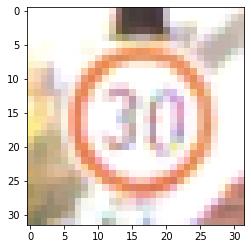

In [12]:
plt.imshow(X_test[400])

In [0]:
pred=T_model.predict(X_test)


In [14]:
names[np.argmax(pred[400])]

'Speed limit (30km/h)'

<BarContainer object of 43 artists>

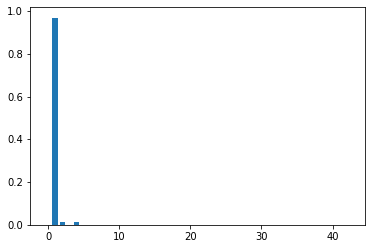

In [15]:
plt.bar(range(43),pred[400])

In [0]:
def predict_and_score(model,X_test,y_test,scoring=accuracy_score):
  y_test_norm=np.argmax(y_test,axis=1)
  pred=model.predict(X_test)
  pred_norm=np.argmax(pred,axis=1)
  return scoring(y_test_norm,pred_norm)

In [17]:
predict_and_score(T_model,X_test,y_test)

0.8945578231292517

In [0]:
def train_and_pred(model):
  T_model=train_model(X_train,y_train,model2,params)
  return predict_and_score(T_model,X_test,y_test)

def get_cnn_3(input_shape,output):
  return Sequential([
       Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'),
       Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
       MaxPool2D(),
       Dropout(0.3),
       Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
       Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
       Dropout(0.3),
       MaxPool2D(),
       Flatten(),
       Dense(124,activation='relu'),
       Dropout(0.3),
       Dense(output,activation='softmax')           
        ])

In [19]:
params={
    'epochs':5
}
model3=get_cnn_3(input_shape,output)
train_and_pred(model3)

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2851 - accuracy: 0.9253 - val_loss: 0.0434 - val_accuracy: 0.9880
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2523 - accuracy: 0.9333 - val_loss: 0.0244 - val_accuracy: 0.9931
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2733 - accuracy: 0.9269 - val_loss: 0.0538 - val_accuracy: 0.9852
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2486 - accuracy: 0.9336 - val_loss: 0.0237 - val_accuracy: 0.9930
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2401 - accuracy: 0.9388 - val_loss: 0.0218 - val_accuracy: 0.9944


0.9360544217687075

In [0]:

def get_cnn_4(input_shape,output):
  return Sequential([
       Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu',padding='same'),
       Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
       MaxPool2D(),
       Dropout(0.3),
       Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
       Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
       MaxPool2D(),
       Dropout(0.3),
       Conv2D(filters=96,kernel_size=(3,3),activation='relu',padding='same'),
       Conv2D(filters=96,kernel_size=(3,3),activation='relu'),
       MaxPool2D(),
       Dropout(0.3),
       Flatten(),
       Dense(124,activation='relu'),
       Dropout(0.3),

       Dense(output,activation='softmax')           
        ])

In [21]:
model4=get_cnn_4(input_shape,output)
train_and_pred(model4)

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2510 - accuracy: 0.9404 - val_loss: 0.0291 - val_accuracy: 0.9916
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2692 - accuracy: 0.9360 - val_loss: 0.0203 - val_accuracy: 0.9953
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2668 - accuracy: 0.9337 - val_loss: 0.0235 - val_accuracy: 0.9949
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2505 - accuracy: 0.9382 - val_loss: 0.0203 - val_accuracy: 0.9943
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2733 - accuracy: 0.9340 - val_loss: 0.0240 - val_accuracy: 0.9939


0.9405895691609978

In [0]:

def get_cnn_5(input_shape,output):
  return Sequential([
       Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu',padding='same'),
       Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
       MaxPool2D(),
       Dropout(0.3),
       Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
       Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
       MaxPool2D(),
       Dropout(0.3),
       Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
       Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
       MaxPool2D(),
       Dropout(0.3),
       Flatten(),
       Dense(1024,activation='relu'),
       Dropout(0.3),
       Dense(1024,activation='relu'),
       Dropout(0.3),

       Dense(output,activation='softmax')           
        ])

In [23]:
model5=get_cnn_5(input_shape,output)
train_and_pred(model5)

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2700 - accuracy: 0.9392 - val_loss: 0.0198 - val_accuracy: 0.9951
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2941 - accuracy: 0.9354 - val_loss: 0.0207 - val_accuracy: 0.9939
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2394 - accuracy: 0.9427 - val_loss: 0.0260 - val_accuracy: 0.9933
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2290 - accuracy: 0.9448 - val_loss: 0.0160 - val_accuracy: 0.9965
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2655 - accuracy: 0.9376 - val_loss: 0.0402 - val_accuracy: 0.9899


0.9027210884353741

In [0]:
X_train_gray =color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray=color.rgb2gray(X_test).reshape(-1,32,32,1)


In [25]:
model6=get_cnn_5((32,32,1),output)
T_model6=train_model(X_train_gray,y_train,model6)
predict_and_score(T_model6,X_test_gray,y_test)

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 2.4976 - accuracy: 0.2930 - val_loss: 0.7291 - val_accuracy: 0.7574
Epoch 2/5
272/272 [==============================] - 4s 16ms/step - loss: 0.5852 - accuracy: 0.8090 - val_loss: 0.1522 - val_accuracy: 0.9554
Epoch 3/5
272/272 [==============================] - 4s 16ms/step - loss: 0.2745 - accuracy: 0.9124 - val_loss: 0.0786 - val_accuracy: 0.9779
Epoch 4/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1828 - accuracy: 0.9429 - val_loss: 0.0525 - val_accuracy: 0.9836
Epoch 5/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1352 - accuracy: 0.9568 - val_loss: 0.0288 - val_accuracy: 0.9909


0.964172335600907

In [0]:
def get_cnn_6(input_shape,output):
  return Sequential([
       Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu',padding='same'),
       Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
       MaxPool2D(),
       Dropout(0.3),
       Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
       Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
       MaxPool2D(),
       Dropout(0.35),
       Conv2D(filters=124,kernel_size=(3,3),activation='relu',padding='same'),
       Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
       MaxPool2D(),
       Dropout(0.35),
       Flatten(),
       Dense(1024,activation='relu'),
       Dropout(0.3),
       Dense(512,activation='relu'),
       Dropout(0.25),
       Dense(512,activation='relu'),
       Dropout(0.3),

       Dense(output,activation='softmax')           
        ])

In [35]:
model7=get_cnn_6((32,32,1),output)
T_model7=train_model(X_train_gray,y_train,model7)
predict_and_score(T_model7,X_test_gray,y_test)

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 2.7671 - accuracy: 0.2142 - val_loss: 1.0650 - val_accuracy: 0.6562
Epoch 2/5
272/272 [==============================] - 4s 16ms/step - loss: 0.8045 - accuracy: 0.7353 - val_loss: 0.2185 - val_accuracy: 0.9260
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.3675 - accuracy: 0.8838 - val_loss: 0.1034 - val_accuracy: 0.9666
Epoch 4/5
272/272 [==============================] - 4s 16ms/step - loss: 0.2356 - accuracy: 0.9241 - val_loss: 0.0489 - val_accuracy: 0.9864
Epoch 5/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1757 - accuracy: 0.9460 - val_loss: 0.0384 - val_accuracy: 0.9896


0.9732426303854875

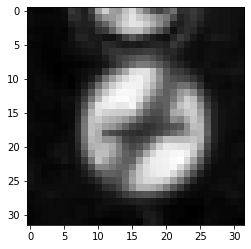

In [47]:
plt.imshow(color.rgb2gray(X_train[0]),cmap=plt.get_cmap('gray'))